# Find delay in VoIP

Context

```
[testcall]
exten => 1,1,Dial(SIP/proxy/1XXXXXXXXX,18)
exten => s,1,Monitor(wav,echo3)
exten => s,n,Wait(1)
exten => s,n,Background(tt-monkeys)
exten => 1,n,Wait(20)
exten => 1,n,Hangup()
```

And call file

```
Channel: local/1@testcall
Callerid: test call <12345677890>
MaxRetries: 0
RetryTime: 60
WaitTime: 25
Context: testcall
Extension: s
Priority: 1
```

This DID comes to echo server.

After the call, we can analyze files to find delay.

In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import signal, fftpack

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

outgoing_line = "./echo3-out.wav"
incoming_line = "./echo3-in.wav"

in_rate, in_data = wavfile.read(incoming_line)
out_rate, out_data = wavfile.read(outgoing_line)

In [2]:
A = fftpack.fft(in_data[:in_rate * 2])
B = fftpack.fft(out_data[:out_rate * 2])
Ar = -A.conjugate()
Br = -B.conjugate()
delay = np.argmax(np.abs(fftpack.ifft(A*Br)))
print("Delay: %f ms" % (delay / (2 * float(in_rate)) * 1000))

Delay: 90.000000 ms


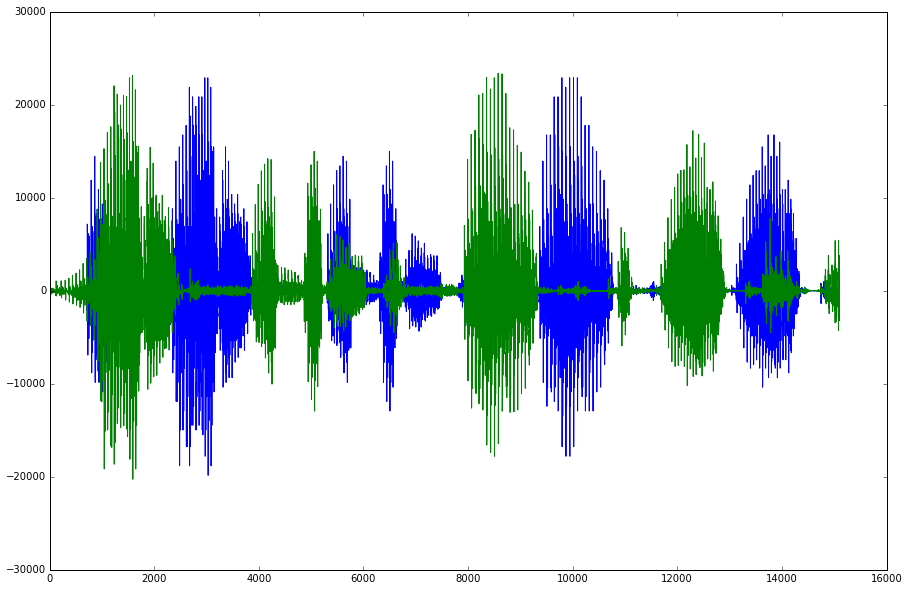

In [3]:
plt.plot(in_data[900:in_rate * 2])
plt.plot(out_data[900:in_rate * 2])
plt.show()

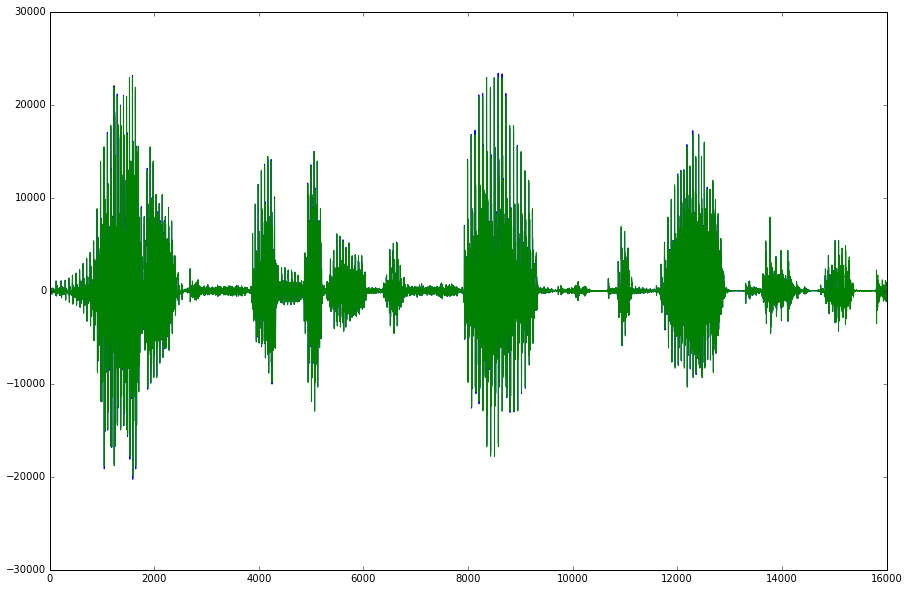

In [4]:
plt.plot(out_data[900:in_rate * 2])
plt.plot(in_data[900 + delay:in_rate * 2 + delay + 900])
plt.show()